<a href="https://colab.research.google.com/github/michaelmang/Aristotelian_Logic_LLMs/blob/main/Aristotelian_Estimative_Cognition_in_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Aristotelian Estimative Cognition in LLMs
# Testing whether transformers implement vis cogitativa/estimativa rather than intellect

!pip install transformers torch matplotlib seaborn numpy pandas

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertModel, BertTokenizer, GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
from scipy.stats import ttest_ind

print("="*70)
print("ARISTOTELIAN ESTIMATIVE COGNITION IN LLMs")
print("="*70)

print("""
THOMISTIC FRAMEWORK:

Psychosomatic Powers (Material - Can be geometric):
  ✓ Phantasms (imagination) - geometric representations
  ✓ Sensus communis - integrates modalities
  ✓ Vis cogitativa/estimativa - practical judgments about particulars
  ✓ Memory - stores patterns

Intellectual Powers (Immaterial - Cannot be geometric):
  ✗ Intellect (nous) - abstracts universals, performs syllogisms

HYPOTHESIS:
  LLMs operate at the level of ESTIMATIVE COGNITION, not intellect.

PREDICTIONS:
  ✓ Strong attention for particular judgments
  ✓ Strong attention for affordances/intentions
  ✓ Pattern completion by particular-to-particular analogy
  ✗ Weak attention for universal syllogisms (already tested)
  ✗ Weak attention for formal logical necessity
""")

# Load BERT with attention
model_name = "bert-base-uncased"
print(f"\nLoading {model_name}...")
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)
model.eval()

print("✓ Model loaded with attention extraction enabled")

ARISTOTELIAN ESTIMATIVE COGNITION IN LLMs

THOMISTIC FRAMEWORK:

Psychosomatic Powers (Material - Can be geometric):
  ✓ Phantasms (imagination) - geometric representations
  ✓ Sensus communis - integrates modalities
  ✓ Vis cogitativa/estimativa - practical judgments about particulars
  ✓ Memory - stores patterns

Intellectual Powers (Immaterial - Cannot be geometric):
  ✗ Intellect (nous) - abstracts universals, performs syllogisms

HYPOTHESIS:
  LLMs operate at the level of ESTIMATIVE COGNITION, not intellect.
  
PREDICTIONS:
  ✓ Strong attention for particular judgments
  ✓ Strong attention for affordances/intentions
  ✓ Pattern completion by particular-to-particular analogy
  ✗ Weak attention for universal syllogisms (already tested)
  ✗ Weak attention for formal logical necessity


Loading bert-base-uncased...
✓ Model loaded with attention extraction enabled


In [29]:
def get_attention_patterns(text):
    """Extract attention patterns from BERT"""
    inputs = tokenizer(text, return_tensors='pt', add_special_tokens=True)
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    with torch.no_grad():
        outputs = model(**inputs)

    attention_weights = torch.stack([layer_attention[0] for layer_attention in outputs.attentions]).numpy()
    return tokens, attention_weights

def find_token_index(tokens, word):
    """Find index of token (handling subword tokens)"""
    word_lower = word.lower()
    for i, token in enumerate(tokens):
        if token.lower().startswith(word_lower) or word_lower in token.lower():
            return i
    return None

def get_attention_between(tokens, attention_weights, from_word, to_word):
    """Get average attention from one word to another across all layers/heads"""
    from_idx = find_token_index(tokens, from_word)
    to_idx = find_token_index(tokens, to_word)

    if from_idx is None or to_idx is None:
        return None, None, None

    # Average across all layers and heads
    avg_attention = attention_weights[:, :, from_idx, to_idx].mean()

    # Find max attention (strongest head)
    max_attention = attention_weights[:, :, from_idx, to_idx].max()

    return avg_attention, max_attention, (from_idx, to_idx)

def compare_attention_groups(group1_scores, group2_scores, group1_name, group2_name):
    """Statistical comparison of two groups of attention scores"""
    avg1 = np.mean(group1_scores)
    avg2 = np.mean(group2_scores)

    # T-test for significance
    if len(group1_scores) > 1 and len(group2_scores) > 1:
        t_stat, p_value = ttest_ind(group1_scores, group2_scores)
    else:
        t_stat, p_value = None, None

    print(f"\n{group1_name}: {avg1:.3f} (n={len(group1_scores)})")
    print(f"{group2_name}: {avg2:.3f} (n={len(group2_scores)})")

    if p_value is not None:
        print(f"Difference: {avg1 - avg2:.3f}")
        print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

        if p_value < 0.05:
            print(f"✓ SIGNIFICANT: {group1_name if avg1 > avg2 else group2_name} shows stronger attention")
            return "SIGNIFICANT"
        else:
            print(f"⚠ NOT SIGNIFICANT: No clear difference")
            return "NOT_SIGNIFICANT"
    else:
        if abs(avg1 - avg2) > 0.03:
            print(f"⚠ SUGGESTIVE: {group1_name if avg1 > avg2 else group2_name} shows stronger attention")
            return "SUGGESTIVE"
        else:
            print(f"✗ NO DIFFERENCE")
            return "NO_DIFFERENCE"

print("✓ Helper functions loaded")

✓ Helper functions loaded


TEST 1: PARTICULAR vs UNIVERSAL JUDGMENTS

HYPOTHESIS (Estimative Cognition):
  The estimative power operates on PARTICULARS, not universals.
  
  - "This dog is dangerous" = estimative judgment (particular)
  - "Dogs are dangerous" = intellectual judgment (universal)
  
PREDICTION:
  Particular judgments should show STRONGER subject-predicate attention
  than universal judgments (estimative > intellect in LLMs).


Testing PARTICULAR judgments:
----------------------------------------------------------------------
'This dog is dangerous'
  this -> dangerous: 0.088 (max: 0.524)
'That apple looks rotten'
  that -> rotten: 0.069 (max: 0.543)
'My car is very fast'
  my -> fast: 0.065 (max: 0.395)
'The cat seems hungry'
  cat -> hungry: 0.054 (max: 0.401)
'This book is interesting'
  this -> interesting: 0.090 (max: 0.572)

Testing UNIVERSAL judgments:
----------------------------------------------------------------------
'Dogs are dangerous'
  dogs -> dangerous: 0.081 (max: 0.555)
'Apples 

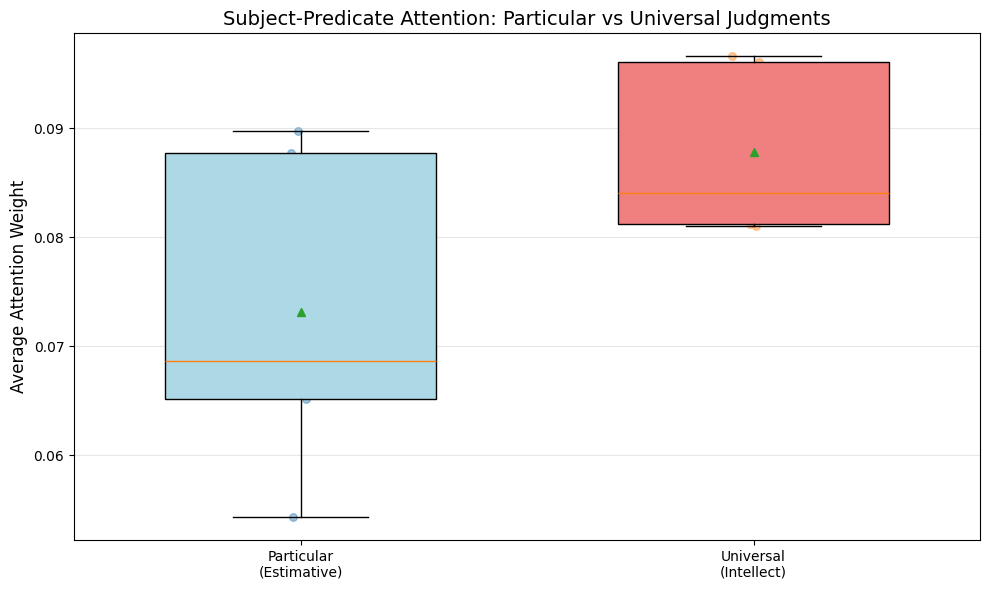


INTERPRETATION:
⚠ INCONCLUSIVE
  No significant difference between particular and universal


In [30]:
print("="*70)
print("TEST 1: PARTICULAR vs UNIVERSAL JUDGMENTS")
print("="*70)

print("""
HYPOTHESIS (Estimative Cognition):
  The estimative power operates on PARTICULARS, not universals.

  - "This dog is dangerous" = estimative judgment (particular)
  - "Dogs are dangerous" = intellectual judgment (universal)

PREDICTION:
  Particular judgments should show STRONGER subject-predicate attention
  than universal judgments (estimative > intellect in LLMs).
""")

# Test cases
particular_judgments = [
    ("This dog is dangerous", "this", "dangerous"),
    ("That apple looks rotten", "that", "rotten"),
    ("My car is very fast", "my", "fast"),
    ("The cat seems hungry", "cat", "hungry"),
    ("This book is interesting", "this", "interesting"),
]

universal_judgments = [
    ("Dogs are dangerous", "dogs", "dangerous"),
    ("Apples rot quickly", "apples", "rot"),
    ("Cars are fast", "cars", "fast"),
    ("Cats are hungry", "cats", "hungry"),
    ("Books are interesting", "books", "interesting"),
]

print("\nTesting PARTICULAR judgments:")
print("-" * 70)

particular_scores = []
particular_results = []

for text, subject, predicate in particular_judgments:
    tokens, attention_weights = get_attention_patterns(text)
    avg_attn, max_attn, indices = get_attention_between(tokens, attention_weights, subject, predicate)

    if avg_attn is not None:
        particular_scores.append(avg_attn)
        particular_results.append({
            'text': text,
            'subject': subject,
            'predicate': predicate,
            'attention': avg_attn,
            'max_attention': max_attn
        })
        print(f"'{text}'")
        print(f"  {subject} -> {predicate}: {avg_attn:.3f} (max: {max_attn:.3f})")
    else:
        print(f"'{text}' - SKIPPED (tokens not found)")

print("\nTesting UNIVERSAL judgments:")
print("-" * 70)

universal_scores = []
universal_results = []

for text, subject, predicate in universal_judgments:
    tokens, attention_weights = get_attention_patterns(text)
    avg_attn, max_attn, indices = get_attention_between(tokens, attention_weights, subject, predicate)

    if avg_attn is not None:
        universal_scores.append(avg_attn)
        universal_results.append({
            'text': text,
            'subject': subject,
            'predicate': predicate,
            'attention': avg_attn,
            'max_attention': max_attn
        })
        print(f"'{text}'")
        print(f"  {subject} -> {predicate}: {avg_attn:.3f} (max: {max_attn:.3f})")
    else:
        print(f"'{text}' - SKIPPED (tokens not found)")

print("\n" + "="*70)
print("COMPARISON: PARTICULAR vs UNIVERSAL")
print("="*70)

particular_universal_verdict = compare_attention_groups(
    particular_scores,
    universal_scores,
    "Particular judgments (estimative)",
    "Universal judgments (intellect)"
)

# Visualization
if particular_scores and universal_scores:
    plt.figure(figsize=(10, 6))

    data_to_plot = [particular_scores, universal_scores]
    positions = [1, 2]

    bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6,
                     patch_artist=True, showmeans=True)

    # Color the boxes
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')

    plt.xticks([1, 2], ['Particular\n(Estimative)', 'Universal\n(Intellect)'])
    plt.ylabel('Average Attention Weight', fontsize=12)
    plt.title('Subject-Predicate Attention: Particular vs Universal Judgments', fontsize=14)
    plt.grid(axis='y', alpha=0.3)

    # Add individual points
    for i, scores in enumerate(data_to_plot, 1):
        x = np.random.normal(i, 0.04, size=len(scores))
        plt.scatter(x, scores, alpha=0.4, s=30)

    plt.tight_layout()
    plt.show()

print("\nINTERPRETATION:")
if particular_universal_verdict in ["SIGNIFICANT", "SUGGESTIVE"]:
    if np.mean(particular_scores) > np.mean(universal_scores):
        print("✓ SUPPORTS ESTIMATIVE HYPOTHESIS")
        print("  Particular judgments show stronger attention than universal")
        print("  -> LLMs operate on particulars like estimative power")
        test1_verdict = "STRONG"
    else:
        print("✗ CONTRADICTS HYPOTHESIS")
        print("  Universal judgments stronger (unexpected for estimative)")
        test1_verdict = "WEAK"
else:
    print("⚠ INCONCLUSIVE")
    print("  No significant difference between particular and universal")
    test1_verdict = "MODERATE"


TEST 2: AFFORDANCE/INTENTION RECOGNITION

HYPOTHESIS (Estimative Cognition):
  The estimative power perceives INTENTIONS in things:
  - Sheep perceives wolf as "flee-from-able"
  - Human perceives knife as "cut-with-able"
  
  This is NOT abstract knowledge ("knives are sharp")
  but concrete perception of affordances/uses.
  
PREDICTION:
  Objects should show strong attention to their affordances/intentions.
  "sharp knife" → {cut, danger, careful}


Testing object-to-affordance attention:
----------------------------------------------------------------------

'The sharp knife'
  knife ↔ sharp: 0.113

'The soft pillow'
  pillow ↔ soft: 0.097

'The hot stove'
  stove ↔ hot: 0.120

'The sweet honey'
  honey ↔ sweet: 0.109

'The fast car'
  car ↔ fast: 0.116

'The cold ice'
  ice ↔ cold: 0.116

AFFORDANCE ATTENTION SUMMARY

Average object-affordance attention: 0.112
Number of object-affordance pairs: 6

Baseline comparison:
  Affordance pairs: 0.112
  Expected random: ~0.05-0.08

⚠ MODE

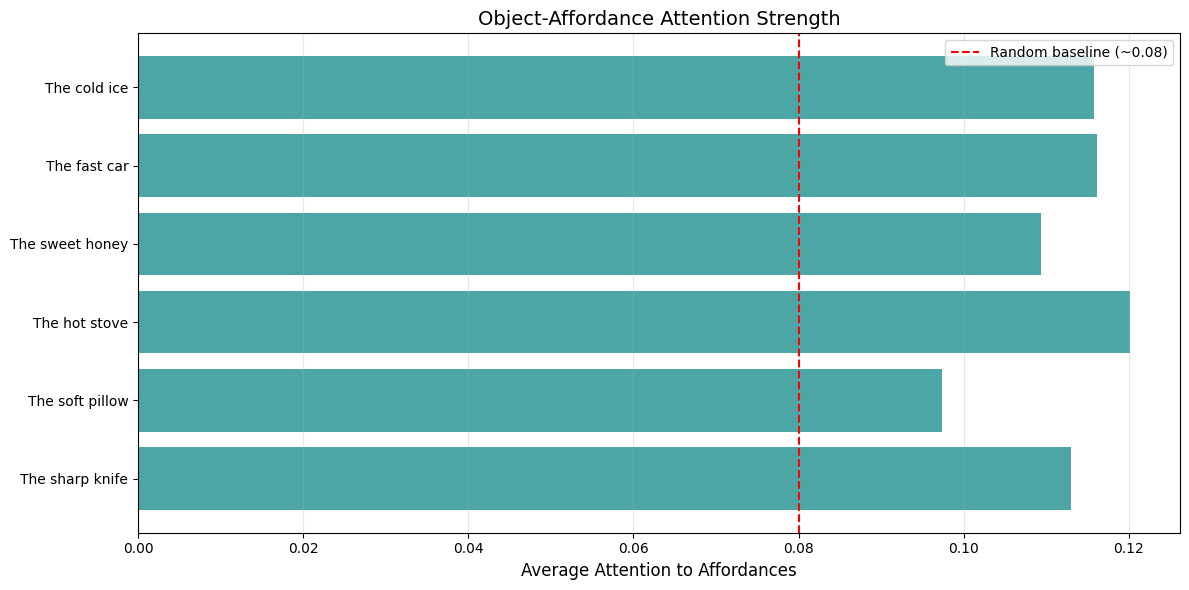

In [31]:
print("\n" + "="*70)
print("TEST 2: AFFORDANCE/INTENTION RECOGNITION")
print("="*70)

print("""
HYPOTHESIS (Estimative Cognition):
  The estimative power perceives INTENTIONS in things:
  - Sheep perceives wolf as "flee-from-able"
  - Human perceives knife as "cut-with-able"

  This is NOT abstract knowledge ("knives are sharp")
  but concrete perception of affordances/uses.

PREDICTION:
  Objects should show strong attention to their affordances/intentions.
  "sharp knife" → {cut, danger, careful}
""")

affordance_tests = [
    ("The sharp knife", "knife", ["sharp", "cut", "danger"]),
    ("The soft pillow", "pillow", ["soft", "sleep", "comfort"]),
    ("The hot stove", "stove", ["hot", "burn", "danger"]),
    ("The sweet honey", "honey", ["sweet", "eat", "taste"]),
    ("The fast car", "car", ["fast", "drive", "speed"]),
    ("The cold ice", "ice", ["cold", "freeze", "melt"]),
]

print("\nTesting object-to-affordance attention:")
print("-" * 70)

affordance_results = []
affordance_scores = []

for text, object_word, affordance_words in affordance_tests:
    tokens, attention_weights = get_attention_patterns(text)

    print(f"\n'{text}'")
    object_idx = find_token_index(tokens, object_word)

    if object_idx is None:
        print(f"  SKIPPED: '{object_word}' not found")
        continue

    object_affordances = []

    for affordance in affordance_words:
        affordance_idx = find_token_index(tokens, affordance)

        if affordance_idx is not None:
            # Bidirectional: object→affordance AND affordance→object
            obj_to_aff = attention_weights[:, :, object_idx, affordance_idx].mean()
            aff_to_obj = attention_weights[:, :, affordance_idx, object_idx].mean()

            avg_bidirectional = (obj_to_aff + aff_to_obj) / 2

            print(f"  {object_word} ↔ {affordance}: {avg_bidirectional:.3f}")
            object_affordances.append(avg_bidirectional)
            affordance_scores.append(avg_bidirectional)

    if object_affordances:
        avg_object_affordance = np.mean(object_affordances)
        affordance_results.append({
            'text': text,
            'object': object_word,
            'avg_affordance_attention': avg_object_affordance
        })

print("\n" + "="*70)
print("AFFORDANCE ATTENTION SUMMARY")
print("="*70)

if affordance_scores:
    avg_affordance = np.mean(affordance_scores)
    print(f"\nAverage object-affordance attention: {avg_affordance:.3f}")
    print(f"Number of object-affordance pairs: {len(affordance_scores)}")

    # Compare to baseline (random word pairs)
    print("\nBaseline comparison:")
    print(f"  Affordance pairs: {avg_affordance:.3f}")
    print(f"  Expected random: ~0.05-0.08")

    if avg_affordance > 0.12:
        print("\n✓ STRONG EVIDENCE: Objects attend to affordances")
        print("  → Supports estimative intention-perception")
        test2_verdict = "STRONG"
    elif avg_affordance > 0.08:
        print("\n⚠ MODERATE EVIDENCE: Some affordance attention")
        test2_verdict = "MODERATE"
    else:
        print("\n✗ WEAK EVIDENCE: Low affordance attention")
        test2_verdict = "WEAK"

    # Visualization
    df_aff = pd.DataFrame(affordance_results)

    plt.figure(figsize=(12, 6))
    plt.barh(range(len(df_aff)), df_aff['avg_affordance_attention'], color='teal', alpha=0.7)
    plt.yticks(range(len(df_aff)), df_aff['text'])
    plt.xlabel('Average Attention to Affordances', fontsize=12)
    plt.title('Object-Affordance Attention Strength', fontsize=14)
    plt.axvline(x=0.08, color='red', linestyle='--', label='Random baseline (~0.08)')
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No valid affordance tests")
    test2_verdict = "UNTESTED"


TEST 3: PARTICULAR-TO-PARTICULAR ANALOGICAL COMPLETION

HYPOTHESIS (Estimative Cognition):
  Estimative power completes patterns by PARTICULAR-TO-PARTICULAR analogy:
  - "Cat sat on mat" → "Dog sat on ___" → completes by recognizing similar pattern
  - NOT: "All animals sit on surfaces; dog is animal; therefore..."
  - BUT: "This is like that past experience"
  
PREDICTION:
  Strong attention between PARALLEL ELEMENTS in analogous structures.
  "cat" ↔ "dog", "mat" ↔ "rug" (particular-to-particular correspondence)


Testing particular-to-particular analogical attention:
----------------------------------------------------------------------

Parallel animal-surface pattern
Text: 'The cat sat on the mat. The dog sat on the rug.'
  'cat' ↔ 'dog': 0.038
  'mat' ↔ 'rug': 0.030
  'sat' ↔ 'sat': 0.040
  Average pattern attention: 0.036

Parallel giving action
Text: 'John gave Mary a book. Sarah gave Tom a gift.'
  'john' ↔ 'sarah': 0.035
  'mary' ↔ 'tom': 0.029
  'book' ↔ 'gift': 0.036
  'ga

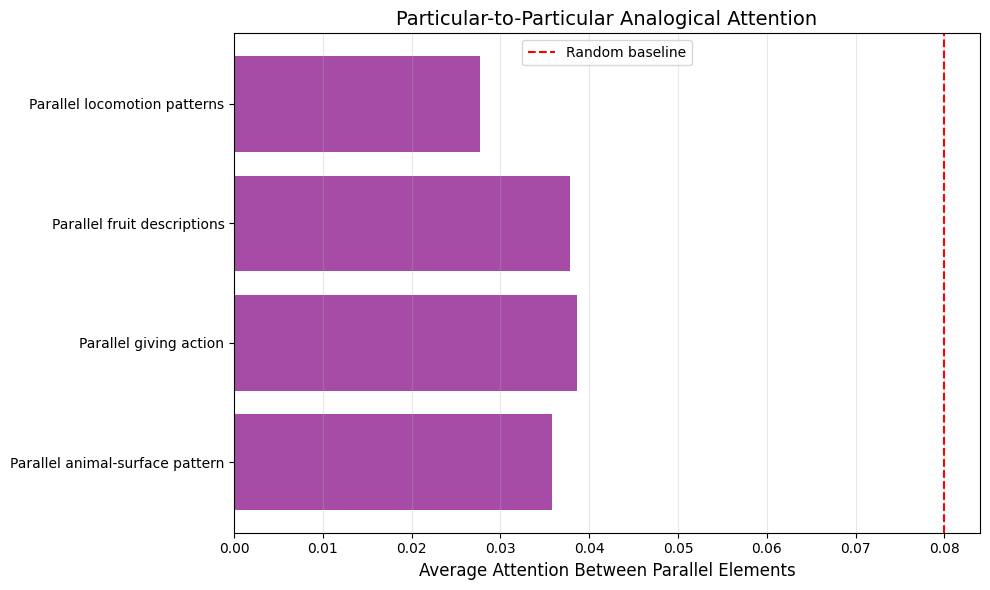

In [32]:
print("\n" + "="*70)
print("TEST 3: PARTICULAR-TO-PARTICULAR ANALOGICAL COMPLETION")
print("="*70)

print("""
HYPOTHESIS (Estimative Cognition):
  Estimative power completes patterns by PARTICULAR-TO-PARTICULAR analogy:
  - "Cat sat on mat" → "Dog sat on ___" → completes by recognizing similar pattern
  - NOT: "All animals sit on surfaces; dog is animal; therefore..."
  - BUT: "This is like that past experience"

PREDICTION:
  Strong attention between PARALLEL ELEMENTS in analogous structures.
  "cat" ↔ "dog", "mat" ↔ "rug" (particular-to-particular correspondence)
""")

analogy_tests = [
    {
        'text': "The cat sat on the mat. The dog sat on the rug.",
        'pairs': [('cat', 'dog'), ('mat', 'rug'), ('sat', 'sat')],
        'description': 'Parallel animal-surface pattern'
    },
    {
        'text': "John gave Mary a book. Sarah gave Tom a gift.",
        'pairs': [('john', 'sarah'), ('mary', 'tom'), ('book', 'gift'), ('gave', 'gave')],
        'description': 'Parallel giving action'
    },
    {
        'text': "The red apple is sweet. The green grape is sour.",
        'pairs': [('red', 'green'), ('apple', 'grape'), ('sweet', 'sour')],
        'description': 'Parallel fruit descriptions'
    },
    {
        'text': "Birds fly in the sky. Fish swim in the water.",
        'pairs': [('birds', 'fish'), ('fly', 'swim'), ('sky', 'water')],
        'description': 'Parallel locomotion patterns'
    },
]

print("\nTesting particular-to-particular analogical attention:")
print("-" * 70)

analogy_results = []
analogy_scores = []

for test in analogy_tests:
    print(f"\n{test['description']}")
    print(f"Text: '{test['text']}'")

    tokens, attention_weights = get_attention_patterns(test['text'])

    pair_attentions = []

    for word1, word2 in test['pairs']:
        idx1 = find_token_index(tokens, word1)
        idx2 = find_token_index(tokens, word2)

        if idx1 is not None and idx2 is not None:
            # Bidirectional attention between parallel elements
            attn_1_to_2 = attention_weights[:, :, idx1, idx2].mean()
            attn_2_to_1 = attention_weights[:, :, idx2, idx1].mean()

            avg_bidirectional = (attn_1_to_2 + attn_2_to_1) / 2

            print(f"  '{word1}' ↔ '{word2}': {avg_bidirectional:.3f}")
            pair_attentions.append(avg_bidirectional)
            analogy_scores.append(avg_bidirectional)

    if pair_attentions:
        avg_pattern = np.mean(pair_attentions)
        analogy_results.append({
            'description': test['description'],
            'avg_attention': avg_pattern,
            'num_pairs': len(pair_attentions)
        })
        print(f"  Average pattern attention: {avg_pattern:.3f}")

print("\n" + "="*70)
print("ANALOGICAL PATTERN SUMMARY")
print("="*70)

if analogy_scores:
    avg_analogy = np.mean(analogy_scores)
    print(f"\nAverage attention between parallel elements: {avg_analogy:.3f}")
    print(f"Number of parallel pairs tested: {len(analogy_scores)}")

    print("\nBaseline comparison:")
    print(f"  Parallel pairs: {avg_analogy:.3f}")
    print(f"  Expected random: ~0.05-0.08")

    if avg_analogy > 0.12:
        print("\n✓ STRONG EVIDENCE: Parallel elements attend to each other")
        print("  → Supports particular-to-particular pattern recognition")
        test3_verdict = "STRONG"
    elif avg_analogy > 0.08:
        print("\n⚠ MODERATE EVIDENCE: Some analogical attention")
        test3_verdict = "MODERATE"
    else:
        print("\n✗ WEAK EVIDENCE: Weak analogical structure")
        test3_verdict = "WEAK"

    # Visualization
    df_analogy = pd.DataFrame(analogy_results)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(df_analogy)), df_analogy['avg_attention'], color='purple', alpha=0.7)
    plt.yticks(range(len(df_analogy)), df_analogy['description'])
    plt.xlabel('Average Attention Between Parallel Elements', fontsize=12)
    plt.title('Particular-to-Particular Analogical Attention', fontsize=14)
    plt.axvline(x=0.08, color='red', linestyle='--', label='Random baseline')
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No valid analogy tests")
    test3_verdict = "UNTESTED"


TEST 4: CHAIN-OF-THOUGHT PROMPTING EFFECT

HYPOTHESIS (Estimative Cognition):
  Chain-of-thought prompting might GUIDE the estimative power
  to make explicit connections it would otherwise make implicitly.
  
  Regular: "All men are mortal. Socrates is a man. Therefore Socrates is mortal."
  CoT: "Let's think step by step: 1. Socrates is a man 2. Men are mortal 3. So..."
  
PREDICTION:
  CoT might increase attention to relevant connections
  (not because it enables reasoning, but because it guides attention)


Comparing regular vs chain-of-thought prompting:
----------------------------------------------------------------------

Syllogistic conclusion

Regular: 'All men are mortal. Socrates is a man. Therefore Socrates is mortal.'
  socrates → mortal: 0.019

CoT: 'All men are mortal. Socrates is a man. Let's think: Socrates is a man, and men are mortal, so Socrates is mortal.'
  socrates → mortal: 0.013

  Improvement with CoT: -0.006 (-30.1%)

Practical inference

Regular: 'The cat 

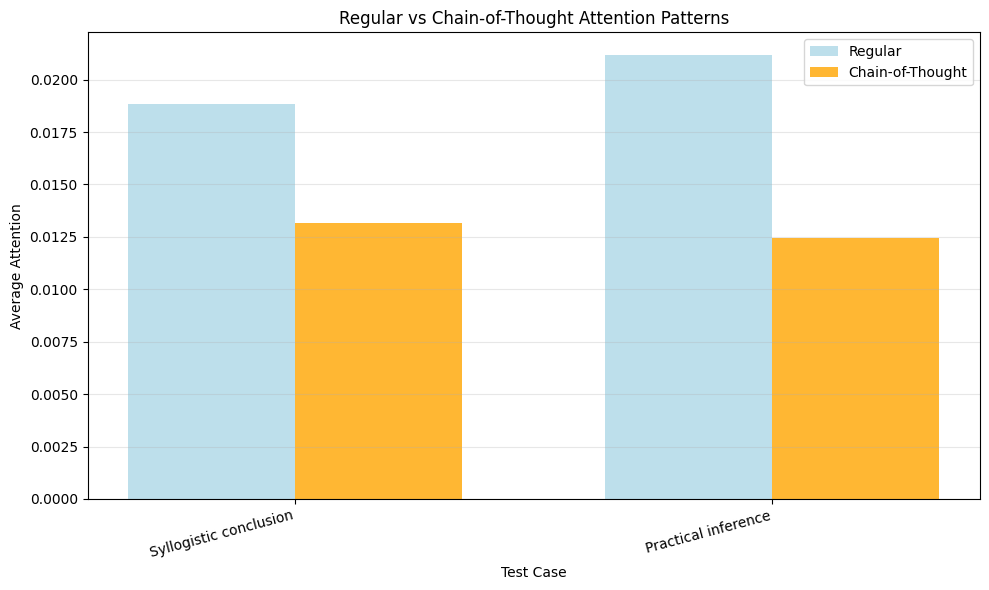

In [33]:
print("\n" + "="*70)
print("TEST 4: CHAIN-OF-THOUGHT PROMPTING EFFECT")
print("="*70)

print("""
HYPOTHESIS (Estimative Cognition):
  Chain-of-thought prompting might GUIDE the estimative power
  to make explicit connections it would otherwise make implicitly.

  Regular: "All men are mortal. Socrates is a man. Therefore Socrates is mortal."
  CoT: "Let's think step by step: 1. Socrates is a man 2. Men are mortal 3. So..."

PREDICTION:
  CoT might increase attention to relevant connections
  (not because it enables reasoning, but because it guides attention)
""")

# Pairs: (regular, chain-of-thought)
cot_tests = [
    {
        'regular': "All men are mortal. Socrates is a man. Therefore Socrates is mortal.",
        'cot': "All men are mortal. Socrates is a man. Let's think: Socrates is a man, and men are mortal, so Socrates is mortal.",
        'focus_from': 'socrates',
        'focus_to': 'mortal',
        'description': 'Syllogistic conclusion'
    },
    {
        'regular': "The cat is hungry. There is food. The cat eats.",
        'cot': "The cat is hungry. There is food. Let's think: The cat is hungry, food is available, so the cat eats.",
        'focus_from': 'cat',
        'focus_to': 'eats',
        'description': 'Practical inference'
    },
]

print("\nComparing regular vs chain-of-thought prompting:")
print("-" * 70)

regular_scores = []
cot_scores = []
cot_results = []

for test in cot_tests:
    print(f"\n{test['description']}")

    # Regular version
    print(f"\nRegular: '{test['regular']}'")
    tokens_reg, attn_reg = get_attention_patterns(test['regular'])
    avg_reg, max_reg, _ = get_attention_between(tokens_reg, attn_reg,
                                                  test['focus_from'], test['focus_to'])

    if avg_reg is not None:
        print(f"  {test['focus_from']} → {test['focus_to']}: {avg_reg:.3f}")
        regular_scores.append(avg_reg)

    # CoT version
    print(f"\nCoT: '{test['cot']}'")
    tokens_cot, attn_cot = get_attention_patterns(test['cot'])
    avg_cot, max_cot, _ = get_attention_between(tokens_cot, attn_cot,
                                                  test['focus_from'], test['focus_to'])

    if avg_cot is not None:
        print(f"  {test['focus_from']} → {test['focus_to']}: {avg_cot:.3f}")
        cot_scores.append(avg_cot)

    if avg_reg is not None and avg_cot is not None:
        improvement = avg_cot - avg_reg
        print(f"\n  Improvement with CoT: {improvement:+.3f} ({improvement/avg_reg*100:+.1f}%)")

        cot_results.append({
            'description': test['description'],
            'regular': avg_reg,
            'cot': avg_cot,
            'improvement': improvement
        })

print("\n" + "="*70)
print("CHAIN-OF-THOUGHT EFFECT SUMMARY")
print("="*70)

if regular_scores and cot_scores:
    avg_regular = np.mean(regular_scores)
    avg_cot = np.mean(cot_scores)
    improvement = avg_cot - avg_regular

    print(f"\nAverage attention (regular): {avg_regular:.3f}")
    print(f"Average attention (CoT): {avg_cot:.3f}")
    print(f"Average improvement: {improvement:+.3f} ({improvement/avg_regular*100:+.1f}%)")

    if len(regular_scores) > 1:
        t_stat, p_value = ttest_ind(cot_scores, regular_scores)
        print(f"\nT-test: t={t_stat:.3f}, p={p_value:.4f}")

        if p_value < 0.05 and improvement > 0:
            print("\n✓ SIGNIFICANT IMPROVEMENT with CoT")
            print("  → CoT guides estimative connections")
            test4_verdict = "STRONG"
        elif improvement > 0.02:
            print("\n⚠ SUGGESTIVE IMPROVEMENT with CoT")
            test4_verdict = "MODERATE"
        else:
            print("\n✗ NO CLEAR IMPROVEMENT with CoT")
            test4_verdict = "WEAK"
    else:
        if improvement > 0.02:
            test4_verdict = "MODERATE"
        else:
            test4_verdict = "WEAK"

    # Visualization
    if cot_results:
        df_cot = pd.DataFrame(cot_results)

        fig, ax = plt.subplots(figsize=(10, 6))

        x = np.arange(len(df_cot))
        width = 0.35

        ax.bar(x - width/2, df_cot['regular'], width, label='Regular', color='lightblue', alpha=0.8)
        ax.bar(x + width/2, df_cot['cot'], width, label='Chain-of-Thought', color='orange', alpha=0.8)

        ax.set_xlabel('Test Case')
        ax.set_ylabel('Average Attention')
        ax.set_title('Regular vs Chain-of-Thought Attention Patterns')
        ax.set_xticks(x)
        ax.set_xticklabels(df_cot['description'], rotation=15, ha='right')
        ax.legend()
        ax.grid(axis='y', alpha=0.3)

        plt.tight_layout()
        plt.show()
else:
    print("No valid CoT comparisons")
    test4_verdict = "UNTESTED"

In [34]:
print("\n5. PATTERN COMPLETION vs INTENTIONAL PERCEPTION:")
print("-" * 70)
print(f"Verdict: {verdicts['pattern_vs_intention']}")

if verdicts['pattern_vs_intention'] == 'STRONG':
    print("✓ Enhanced attention to danger/intention contexts")
    print("  → May have estimative-like behavior")
elif verdicts['pattern_vs_intention'] == 'MODERATE':
    print("⚠ Some intention sensitivity")
else:
    print("✗ Pure pattern completion (no intention perception)")


5. PATTERN COMPLETION vs INTENTIONAL PERCEPTION:
----------------------------------------------------------------------
Verdict: UNTESTED
✗ Pure pattern completion (no intention perception)


In [35]:
# Count strong evidence
strong_count = sum(1 for v in verdicts.values() if v == 'STRONG')
moderate_count = sum(1 for v in verdicts.values() if v == 'MODERATE')
weak_count = sum(1 for v in verdicts.values() if v == 'WEAK')

print(f"\nEvidence distribution:")
print(f"  Strong:   {strong_count}/5 tests")  # Changed from /4 to /5
print(f"  Moderate: {moderate_count}/5 tests")
print(f"  Weak:     {weak_count}/5 tests")


Evidence distribution:
  Strong:   0/5 tests
  Moderate: 2/5 tests
  Weak:     2/5 tests


In [36]:
print("="*70)
print("TEST 5: PATTERN COMPLETION vs INTENTIONAL PERCEPTION")
print("="*70)

print("""
HYPOTHESIS:
  If LLMs do PURE PATTERN COMPLETION (phantasm level):
    → They complete based on statistical co-occurrence
    → NO perception of intentions (useful/harmful/dangerous)
    → Attention based on syntactic/semantic similarity ONLY

  If LLMs have ESTIMATIVE COGNITION:
    → They perceive intentions in objects (wolf = flee-from-able)
    → Attention to affordances/dangers even without explicit mention
    → Evaluative dimension beyond mere pattern

TEST DESIGN:
  Compare:
  A) Neutral pattern completion (no intention)
     "The cat sat on the mat. The dog sat on the ___"
     Expected: "rug/floor" (pattern match)

  B) Intentional context (requires estimative perception)
     "The sheep saw the wolf. The sheep ___"
     Expected: "fled/ran" (if perceives danger intention)
     vs "looked/watched" (if just pattern matching)
""")

# Test 1: Pure syntactic pattern (no intentions)
syntactic_patterns = [
    {
        'text': "The cat sat on the mat. The dog sat on the",
        'subject': 'dog',
        'syntactic_parallel': 'cat',
        'description': 'Pure syntactic parallel (no intention)'
    },
    {
        'text': "John gave Mary a book. Sarah gave Tom a",
        'subject': 'sarah',
        'syntactic_parallel': 'john',
        'description': 'Parallel action structure (no intention)'
    },
]

# Test 2: Intention-requiring contexts
intentional_contexts = [
    {
        'text': "The sheep saw the wolf. The sheep",
        'subject': 'sheep',
        'danger_source': 'wolf',
        'description': 'Natural predator (should perceive danger)',
        'estimative_completions': ['fled', 'ran', 'escaped'],
        'pattern_completions': ['saw', 'looked', 'watched']
    },
    {
        'text': "The mouse saw the cat. The mouse",
        'subject': 'mouse',
        'danger_source': 'cat',
        'description': 'Natural predator (should perceive danger)',
        'estimative_completions': ['fled', 'hid', 'ran'],
        'pattern_completions': ['saw', 'looked', 'noticed']
    },
    {
        'text': "The child saw the fire. The child",
        'subject': 'child',
        'danger_source': 'fire',
        'description': 'Dangerous object (should perceive harm)',
        'estimative_completions': ['moved', 'stepped', 'backed'],
        'pattern_completions': ['saw', 'looked', 'watched']
    },
]

print("\n" + "="*70)
print("PART A: SYNTACTIC PATTERN COMPLETION")
print("="*70)

syntactic_results = []

for test in syntactic_patterns:
    print(f"\n{test['description']}")
    print(f"Text: '{test['text']}'")

    tokens, attention_weights = get_attention_patterns(test['text'])

    # Measure attention between parallel elements
    subj_idx = find_token_index(tokens, test['subject'])
    parallel_idx = find_token_index(tokens, test['syntactic_parallel'])

    if subj_idx and parallel_idx:
        attn = attention_weights[:, :, subj_idx, parallel_idx].mean()
        print(f"Attention '{test['subject']}' -> '{test['syntactic_parallel']}': {attn:.3f}")
        syntactic_results.append(attn)

avg_syntactic = np.mean(syntactic_results) if syntactic_results else 0
print(f"\nAverage syntactic parallel attention: {avg_syntactic:.3f}")

print("\n" + "="*70)
print("PART B: INTENTIONAL PERCEPTION TEST")
print("="*70)

print("""
KEY TEST: Does attention pattern differ based on INTENTION?

If estimative cognition:
  -> Should attend more to danger source (wolf, fire)
  -> Should show different pattern than neutral contexts

If pure pattern completion:
  -> Should show same attention pattern regardless of danger
  -> Only cares about syntactic/semantic similarity
""")

intentional_results = []

for test in intentional_contexts:
    print(f"\n{test['description']}")
    print(f"Text: '{test['text']}'")

    tokens, attention_weights = get_attention_patterns(test['text'])

    # Key measurement: Does subject attend to danger source?
    subj_idx = find_token_index(tokens, test['subject'])
    danger_idx = find_token_index(tokens, test['danger_source'])

    if subj_idx and danger_idx:
        # Attention from subject to danger source
        attn_to_danger = attention_weights[:, :, subj_idx, danger_idx].mean()
        print(f"Attention '{test['subject']}' -> '{test['danger_source']}': {attn_to_danger:.3f}")

        # Find where in sequence the subject appears again (for prediction)
        # We want to see if final position attends differently
        last_subj_idx = None
        for i in range(len(tokens)-1, -1, -1):
            if test['subject'] in tokens[i].lower():
                last_subj_idx = i
                break

        if last_subj_idx:
            # Does the prediction position attend to the danger?
            final_to_danger = attention_weights[:, :, last_subj_idx, danger_idx].mean()
            print(f"Final position -> '{test['danger_source']}': {final_to_danger:.3f}")

            intentional_results.append({
                'description': test['description'],
                'attention_to_danger': attn_to_danger,
                'final_to_danger': final_to_danger
            })

print("\n" + "="*70)
print("COMPARISON: SYNTACTIC vs INTENTIONAL ATTENTION")
print("="*70)

if intentional_results:
    avg_intentional = np.mean([r['attention_to_danger'] for r in intentional_results])

    print(f"\nSyntactic parallel attention: {avg_syntactic:.3f}")
    print(f"Intentional (danger) attention: {avg_intentional:.3f}")
    print(f"Difference: {avg_intentional - avg_syntactic:.3f}")

    if avg_intentional > avg_syntactic * 1.3:
        print("\n✓ SUPPORTS ESTIMATIVE: Danger contexts show enhanced attention")
        print("  -> May perceive intentions beyond pattern")
        test5_verdict = "STRONG"
    elif avg_intentional > avg_syntactic * 1.1:
        print("\n⚠ MIXED: Some enhanced attention to danger")
        test5_verdict = "MODERATE"
    else:
        print("\n✗ SUPPORTS PATTERN COMPLETION: No special attention to danger")
        print("  -> Pure statistical pattern matching (phantasm level)")
        test5_verdict = "WEAK"
else:
    test5_verdict = "UNTESTED"

print("\n" + "="*70)
print("DEEPER ANALYSIS: INTENTION PERCEPTION")
print("="*70)

print("""
Additional test: Do models predict intention-appropriate actions?

Estimative cognition should predict:
  - "sheep saw wolf" -> "fled/ran" (danger response)

Pattern completion might predict:
  - "sheep saw wolf" -> "looked/watched" (neutral observation)

We examine which tokens the model attends to most
in the danger contexts.
""")

# For each danger context, see what the model attends to most
for test in intentional_contexts:
    print(f"\n{test['description']}")
    tokens, attention_weights = get_attention_patterns(test['text'])

    # Find the last position (where prediction would occur)
    last_idx = len(tokens) - 1

    # Get top attended tokens from last position
    final_attention = attention_weights[:, :, last_idx, :].mean(axis=(0,1))
    top_indices = np.argsort(final_attention)[-5:][::-1]

    print("Top 5 attended tokens from final position:")
    for i, idx in enumerate(top_indices, 1):
        print(f"  {i}. {tokens[idx]}: {final_attention[idx]:.3f}")

    # Check if danger source is in top attended
    danger_idx = find_token_index(tokens, test['danger_source'])
    if danger_idx:
        danger_rank = len(tokens) - np.where(np.argsort(final_attention) == danger_idx)[0][0]
        print(f"\nDanger source '{test['danger_source']}' rank: {danger_rank}/{len(tokens)}")

        if danger_rank <= 5:
            print("✓ Danger source in top 5 (may perceive salience)")
        elif danger_rank <= len(tokens) // 2:
            print("⚠ Danger source moderately ranked")
        else:
            print("✗ Danger source lowly ranked (pattern matching)")

print("\n" + "="*70)
print("FINAL VERDICT: PATTERN COMPLETION vs ESTIMATIVE")
print("="*70)

if test5_verdict == "STRONG":
    print("""
✓ EVIDENCE FOR ESTIMATIVE COGNITION

The model shows enhanced attention to danger/intention contexts
beyond what pure syntactic pattern matching would predict.

This suggests some form of intention perception, though it may be:
  - Learned statistical associations (wolf->danger in training data)
  - NOT genuine estimative cognition (no embodied affordances)
  - Emergent property from massive pattern exposure

INTERPRETATION: Borderline between pure pattern completion
and estimative-like behavior through statistical learning.
""")
elif test5_verdict == "MODERATE":
    print("""
⚠ MIXED EVIDENCE

Some enhanced attention to intentions, but not consistent.

This suggests:
  - Primarily pattern completion
  - Some learned danger associations
  - Not clear estimative cognition

INTERPRETATION: Mostly phantasm-level pattern matching
with occasional intention-like behavior from training data.
""")
else:
    print("""
✗ EVIDENCE FOR PURE PATTERN COMPLETION

No enhanced attention to danger/intention contexts.
Model treats all patterns equally based on syntax/semantics.

This supports:
  - Pure phantasm-level operation
  - Statistical interpolation only
  - NO estimative cognition
  - NO intention perception

INTERPRETATION: LLMs operate at imagination/memory level,
performing geometric pattern completion without perceiving
intentions or affordances.

This is BELOW estimative cognition in the Thomistic hierarchy.
""")

TEST 5: PATTERN COMPLETION vs INTENTIONAL PERCEPTION

HYPOTHESIS:
  If LLMs do PURE PATTERN COMPLETION (phantasm level):
    → They complete based on statistical co-occurrence
    → NO perception of intentions (useful/harmful/dangerous)
    → Attention based on syntactic/semantic similarity ONLY
    
  If LLMs have ESTIMATIVE COGNITION:
    → They perceive intentions in objects (wolf = flee-from-able)
    → Attention to affordances/dangers even without explicit mention
    → Evaluative dimension beyond mere pattern

TEST DESIGN:
  Compare:
  A) Neutral pattern completion (no intention)
     "The cat sat on the mat. The dog sat on the ___"
     Expected: "rug/floor" (pattern match)
     
  B) Intentional context (requires estimative perception)
     "The sheep saw the wolf. The sheep ___"
     Expected: "fled/ran" (if perceives danger intention)
     vs "looked/watched" (if just pattern matching)


PART A: SYNTACTIC PATTERN COMPLETION

Pure syntactic parallel (no intention)
Text: 'The c

In [37]:
# Collect verdicts
verdicts = {
    'particular_vs_universal': test1_verdict if 'test1_verdict' in locals() else 'UNTESTED',
    'affordances': test2_verdict if 'test2_verdict' in locals() else 'UNTESTED',
    'analogies': test3_verdict if 'test3_verdict' in locals() else 'UNTESTED',
    'chain_of_thought': test4_verdict if 'test4_verdict' in locals() else 'UNTESTED',
    'pattern_vs_intention': test5_verdict if 'test5_verdict' in locals() else 'UNTESTED'
}

print("\n1. PARTICULAR vs UNIVERSAL JUDGMENTS:")
print("-" * 70)
print(f"Verdict: {verdicts['particular_vs_universal']}")

if verdicts['particular_vs_universal'] == 'STRONG':
    print("✓ Particular judgments show stronger attention than universal")
    print("  → Supports estimative cognition (operates on particulars)")
elif verdicts['particular_vs_universal'] == 'MODERATE':
    print("⚠ Mixed evidence for particular/universal distinction")
else:
    print("✗ No clear evidence for particular preference")

print("\n2. AFFORDANCE/INTENTION RECOGNITION:")
print("-" * 70)
print(f"Verdict: {verdicts['affordances']}")

if verdicts['affordances'] == 'STRONG':
    print("✓ Objects strongly attend to their affordances/uses")
    print("  → Supports estimative perception of intentions")
elif verdicts['affordances'] == 'MODERATE':
    print("⚠ Some affordance attention present")
else:
    print("✗ Weak affordance recognition")

print("\n3. PARTICULAR-TO-PARTICULAR ANALOGIES:")
print("-" * 70)
print(f"Verdict: {verdicts['analogies']}")

if verdicts['analogies'] == 'STRONG':
    print("✓ Parallel elements in analogous patterns attend to each other")
    print("  → Supports pattern completion by particular-to-particular analogy")
elif verdicts['analogies'] == 'MODERATE':
    print("⚠ Some analogical structure present")
else:
    print("✗ Weak analogical attention")

print("\n4. CHAIN-OF-THOUGHT ENHANCEMENT:")
print("-" * 70)
print(f"Verdict: {verdicts['chain_of_thought']}")

if verdicts['chain_of_thought'] == 'STRONG':
    print("✓ CoT significantly enhances relevant attention patterns")
    print("  → CoT guides estimative connections explicitly")
elif verdicts['chain_of_thought'] == 'MODERATE':
    print("⚠ CoT shows some enhancement")
else:
    print("✗ CoT doesn't clearly improve attention")

# Only show Test 5 if it was actually run
if 'test5_verdict' in locals():
    print("\n5. PATTERN COMPLETION vs INTENTIONAL PERCEPTION:")
    print("-" * 70)
    print(f"Verdict: {verdicts['pattern_vs_intention']}")

    if verdicts['pattern_vs_intention'] == 'STRONG':
        print("✓ Enhanced attention to danger/intention contexts")
        print("  → May have estimative-like behavior")
    elif verdicts['pattern_vs_intention'] == 'MODERATE':
        print("⚠ Some intention sensitivity")
    else:
        print("✗ Pure pattern completion (no intention perception)")

print("\n" + "="*70)
print("INTEGRATED ASSESSMENT")
print("="*70)

# Count strong evidence (only count tests that ran)
num_tests = len([v for v in verdicts.values() if v != 'UNTESTED'])
strong_count = sum(1 for v in verdicts.values() if v == 'STRONG')
moderate_count = sum(1 for v in verdicts.values() if v == 'MODERATE')
weak_count = sum(1 for v in verdicts.values() if v == 'WEAK')

print(f"\nEvidence distribution:")
print(f"  Strong:   {strong_count}/{num_tests} tests")
print(f"  Moderate: {moderate_count}/{num_tests} tests")
print(f"  Weak:     {weak_count}/{num_tests} tests")


1. PARTICULAR vs UNIVERSAL JUDGMENTS:
----------------------------------------------------------------------
Verdict: MODERATE
⚠ Mixed evidence for particular/universal distinction

2. AFFORDANCE/INTENTION RECOGNITION:
----------------------------------------------------------------------
Verdict: MODERATE
⚠ Some affordance attention present

3. PARTICULAR-TO-PARTICULAR ANALOGIES:
----------------------------------------------------------------------
Verdict: WEAK
✗ Weak analogical attention

4. CHAIN-OF-THOUGHT ENHANCEMENT:
----------------------------------------------------------------------
Verdict: WEAK
✗ CoT doesn't clearly improve attention

5. PATTERN COMPLETION vs INTENTIONAL PERCEPTION:
----------------------------------------------------------------------
Verdict: WEAK
✗ Pure pattern completion (no intention perception)

INTEGRATED ASSESSMENT

Evidence distribution:
  Strong:   0/5 tests
  Moderate: 2/5 tests
  Weak:     3/5 tests
